<a href="https://colab.research.google.com/github/fjot/project_7_cnn/blob/main/project_7_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image classification using CNNs in Keras**

**Context**:
- Can you differentiate a weed from a crop seedling?
- The ability to do so effectively can mean better crop yields and better stewardship of the environment.
- The Aarhus University Signal Processing group, in collaboration with 
- University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

In [4]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2 
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPooling2D, Dropout, GlobalMaxPooling2D
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import seaborn as sns


In [6]:
from google.colab import drive

#**1. Load the data**
### - Import the libraries
### - load dataset
### - print shape of data
### - visualize the images in dataset

In [7]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
project_path = '/content/drive/My Drive/Colab Notebooks/CNN/'

In [9]:
dataset_file = project_path + 'images.npy'
label_file =  project_path + 'Labels.csv'

In [10]:
# Images
X = np.load(dataset_file)

In [11]:
# Labels
y = pd.read_csv(label_file)

In [12]:
X.shape

(4750, 128, 128, 3)

In [13]:
y.shape

(4750, 1)

Small-flowered Cranesbill


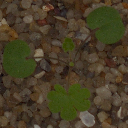

In [14]:
#Display a sample for dataset
i = 1
image = X[i]
label = y['Label'][i]
print(label)
cv2_imshow(image)

In [15]:
X.dtype

dtype('uint8')

# **2. Data Pre-processing**
### - Normalization
### - Gaussian Blurring
### - Visualize data after pre-processing

In [16]:
# Normalization / Convert the values into float32. After but before to train the model I will normalize the data between 0 and 1.
X_n = X.astype('float32')

In [17]:
X_n.dtype

dtype('float32')

In [18]:
# Preprocessing the images to reduce image noise and reduce detail. Filter Applied (5,5)
X_g = []
for image in X_n:
   gau = cv2.GaussianBlur(image, (5, 5), 0)
   X_g.append(gau)

In [19]:
X_g = X.astype('float32')
X_g.dtype

dtype('float32')

In [20]:
X_g.shape

(4750, 128, 128, 3)

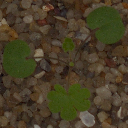

In [21]:
# Display a sample for dataset with GaussianBlur, I displayed just one of them because there are 6000 images.
i = 1
image_gau = X_g[i]
cv2_imshow(image_gau)

# **3. Make data compatible**
- Convert labels to one-hot-vectors.
- Print the label for y_train[0].
- Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
- Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [22]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [23]:
# Assigning numerical values and storing in another column 
y['Label_Categoric'] = labelencoder.fit_transform(y['Label'])

In [24]:
# Alternative One
# creating instance of OneHotEnconder
encOne = OneHotEncoder()

In [26]:
# creating a new data frame and join() after with y just for visualization. I will user to_categorical from Keras for the OneHotEnconder
enc_df = pd.DataFrame(encOne.fit_transform(y[['Label_Categoric']]).toarray())
y = y.join(enc_df)
y

,Label,Label_Categoric,0,1,2,3,4,5,6,7,8,9,10,11
0,Small-flowered Cranesbill,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Small-flowered Cranesbill,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Small-flowered Cranesbill,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Small-flowered Cranesbill,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Small-flowered Cranesbill,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,Loose Silky-bent,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4746,Loose Silky-bent,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4747,Loose Silky-bent,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4748,Loose Silky-bent,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Alternative Two
#one-hot encode target column
y = to_categorical(y[['Label_Categoric']])
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [29]:
#Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_g, y, test_size=0.3, random_state=1)

In [30]:
X_train.shape

(3325, 128, 128, 3)

In [31]:
#Split data into validation and testing
X_val, X_test, y_val, y_test = train_test_split(X_g, y, test_size=0.5, random_state=1)

In [32]:
#Print the label for y_train[0].
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [33]:
#Checking the shape of data.
print(X_train[9, :, :, :].shape)
print(X_val[9, :, :, :].shape)
print(X_test[9, :, :, :].shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


## **Insight**
The data is already in compatible shape to build the model.

# **4. Building CNN**
- Define layers.
- Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [34]:
# Normalization to prepare data to fit the model.
X_train /= 255.0 
X_test /= 255.0

In [35]:

#add model layers
model = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
model.add(Flatten())

# Adding a fully connected layer with 512 neurons
model.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
model.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
model.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 12 neurons to predict the categorical classifcation
model.add(Dense(units = 12, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0

In [36]:
# Applying adam as an optimizer and categorical crossentropy as a loss function
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# **5. Fit and evaluate model and print confusion matrix.**

In [37]:
# Fitting the model
history = model.fit(X_train, y_train,
                    batch_size=None,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    shuffle=True,
                    verbose=1)

Epoch 1/50
104/104 [==============================] - 33s 28ms/step - loss: 2.3982 - accuracy: 0.1547 - val_loss: 1.7391 - val_accuracy: 0.3865
Epoch 2/50
104/104 [==============================] - 2s 23ms/step - loss: 1.6794 - accuracy: 0.3938 - val_loss: 1.4042 - val_accuracy: 0.5133
Epoch 3/50
104/104 [==============================] - 2s 23ms/step - loss: 1.3943 - accuracy: 0.5082 - val_loss: 1.1296 - val_accuracy: 0.6105
Epoch 4/50
104/104 [==============================] - 2s 23ms/step - loss: 1.1759 - accuracy: 0.5878 - val_loss: 1.1276 - val_accuracy: 0.5878
Epoch 5/50
104/104 [==============================] - 2s 23ms/step - loss: 0.9824 - accuracy: 0.6515 - val_loss: 0.8246 - val_accuracy: 0.7272
Epoch 6/50
104/104 [==============================] - 2s 23ms/step - loss: 0.7752 - accuracy: 0.7346 - val_loss: 0.6941 - val_accuracy: 0.7697
Epoch 7/50
104/104 [==============================] - 2s 23ms/step - loss: 0.6421 - accuracy: 0.7954 - val_loss: 0.6773 - val_accuracy: 0.777

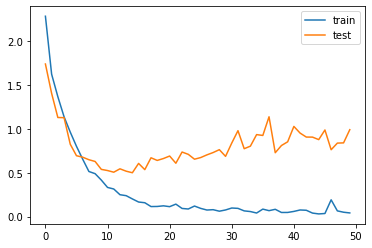

In [38]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

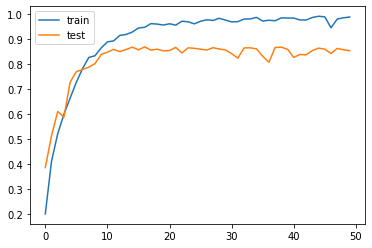

In [39]:
# plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [40]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)

75/75 [==============================] - 1s 7ms/step - loss: 0.9906 - accuracy: 0.8526


In [41]:
# Print result for test data
print(model.metrics_names)
print(scores) 

['loss', 'accuracy']
[0.9905786514282227, 0.8526315689086914]


## **Insights**

Its look that the model is overfitting, but the accurrancy from the model 0.85 but it looks neat. By modifying the layers of the model we could have closer values. 

In [42]:
pred = model.predict(X_test)
print(pred)

[[1.5359936e-05 3.6185014e-08 1.5480462e-09 ... 3.6214999e-05
  2.1811558e-01 4.7552467e-06]
 [3.2758476e-06 7.1027830e-07 1.9645013e-08 ... 3.4286124e-08
  4.8303112e-10 4.7957008e-05]
 [6.4979446e-05 1.6064922e-06 1.6261677e-07 ... 1.0855363e-09
  4.6090065e-09 1.4804217e-03]
 ...
 [3.2865451e-18 1.0000000e+00 1.7842425e-09 ... 7.4297261e-12
  2.3902937e-11 2.9154068e-11]
 [2.9491257e-06 3.9511509e-04 1.1464917e-04 ... 6.1907741e-04
  3.4840713e-04 6.8064465e-04]
 [1.2182874e-06 6.2477775e-12 2.6945510e-09 ... 7.2565122e-08
  1.3186614e-08 1.0225505e-06]]


In [43]:
# I need a vector of labels.
pred=np.argmax(pred, axis=1)

In [47]:
# I need a vector of labels.
y_test=np.argmax(y_test, axis=1)

In [48]:
cm = classification_report(y_test, pred)
print(cm)

              precision    recall  f1-score   support

           0       0.68      0.52      0.59       143
           1       0.90      0.97      0.93       183
           2       0.93      0.84      0.88       134
           3       0.90      0.97      0.93       314
           4       0.73      0.75      0.74       107
           5       0.91      0.82      0.86       247
           6       0.74      0.91      0.81       325
           7       0.93      0.79      0.86       117
           8       0.82      0.86      0.84       248
           9       0.96      0.73      0.83       122
          10       0.92      0.95      0.93       241
          11       0.90      0.80      0.84       194

    accuracy                           0.85      2375
   macro avg       0.86      0.83      0.84      2375
weighted avg       0.86      0.85      0.85      2375



## **Insights**
We can see on the classification report the different labels and its values for precision, recall and f1-score. All seem to have good result. The label 0 has the lowest value for precision and recall. The model has the worst image performance to predict this label. We can modify the model to try a better result.

Text(69.0, 0.5, 'Actual')

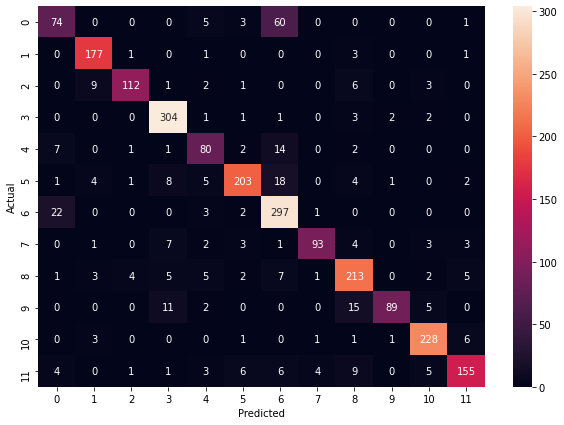

In [49]:
cm_ = tf.math.confusion_matrix(labels=y_test,predictions=pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm_, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## **Insights**
In the confusion Matrix we can see the problem with the recall that we already saw before. The actual value for label 0 was predicted for the model as a 6. 

# **6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].**

Label predicted for X_test[2] = [8]


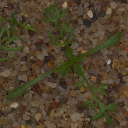

In [62]:
# Prediction for X_test[2]
img = X_test[2]
img_ = np.expand_dims(img, axis=0)
Y_pred = model.predict(img_)
y_pred = np.argmax(Y_pred, axis=1)
print(f'Label predicted for X_test[2] = {y_pred}')
cv2_imshow(img*255)

Label predicted for X_test[3] = [3]


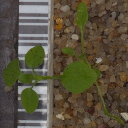

In [63]:
# Prediction for X_test[3]
img = X_test[3]
img_ = np.expand_dims(img, axis=0)
Y_pred = model.predict(img_)
y_pred = np.argmax(Y_pred, axis=1)
print(f'Label predicted for X_test[3] = {y_pred}')
cv2_imshow(img*255)

Label predicted for X_test[33] = [6]


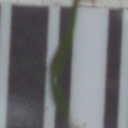

In [64]:
# Prediction for X_test[33]
img = X_test[33]
img_ = np.expand_dims(img, axis=0)
Y_pred = model.predict(img_)
y_pred = np.argmax(Y_pred, axis=1)
print(f'Label predicted for X_test[33] = {y_pred}')
cv2_imshow(img*255)

Label predicted for X_test[36] = [2]


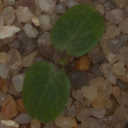

In [65]:
# Prediction for X_test[36]
img = X_test[36]
img_ = np.expand_dims(img, axis=0)
Y_pred = model.predict(img_)
y_pred = np.argmax(Y_pred, axis=1)
print(f'Label predicted for X_test[36] = {y_pred}')
cv2_imshow(img*255)

Label predicted for X_test[59] = [9]


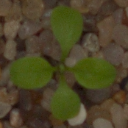

In [66]:
# Prediction for X_test[59]
img = X_test[59]
img_ = np.expand_dims(img, axis=0)
Y_pred = model.predict(img_)
y_pred = np.argmax(Y_pred, axis=1)
print(f'Label predicted for X_test[59] = {y_pred}')
cv2_imshow(img*255)